In [1]:
from rdkit import Chem
from rdkit.DataStructs.cDataStructs import TanimotoSimilarity
from rdkit.Chem.MolStandardize import rdMolStandardize
import pubchempy as pcp
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
initial_smi = pd.read_excel(r'../prediction_and_selection/Prediction_initializers_ROR_activ.xlsx')
initial_smi = list(initial_smi['SMILES'])
initial_smi = pd.DataFrame(initial_smi, columns=['SMILES'])
print("Initial data description: ")
print(initial_smi.describe())

print("SMILES used to predict new molecules description: ")
print(initial_smi.describe())

print("Examples of initial structures: ")
print(initial_smi[0:3])

Initial data description: 
                                      SMILES
count                                      5
unique                                     5
top     CCC(=O)Nc1ccc2nn(-c3ccc(CC)cc3)nc2c1
freq                                       1
SMILES used to predict new molecules description: 
                                      SMILES
count                                      5
unique                                     5
top     CCC(=O)Nc1ccc2nn(-c3ccc(CC)cc3)nc2c1
freq                                       1
Examples of initial structures: 
                                              SMILES
0               CCC(=O)Nc1ccc2nn(-c3ccc(CC)cc3)nc2c1
1                Cc1cccc(C(=O)Nc2cc(-c3ccccc3)no2)c1
2  CC(=O)N1CCN(Cc2ccc(-c3ccc(C(O)(C(F)(F)F)C(F)(F...


In [3]:
output_smi = pd.read_excel(r'../prediction_and_selection/All_generated_SMILES_SYBA_filtration.xlsx')
output_smi = list(output_smi['SMILES'])
docked_mols = output_smi.copy()
output_smi[0:3]

['CC1=CC=CC(C(=O)CC2=NC(Cl)=CC3=CC=CN=C23)=C1',
 'CC1=CC=CC(C(=O)NC2=CC(C3=CC=CC=C3)=NO2)=C1',
 'CC1=CC=CC(C(=O)CC2=NC(CC3=CC=CO3)=CS2)=C1']

In [4]:
#all_generated = pd.read_excel(r'../prediction_and_selection/)

In [5]:
initial_mol = [Chem.MolFromSmiles(smi) for smi in initial_smi['SMILES']]

In [6]:
output_smi = [Chem.MolFromSmiles(smi) for smi in output_smi]

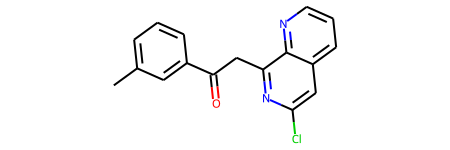

In [7]:
output_smi[0]

In [8]:
largest_Fragment = rdMolStandardize.LargestFragmentChooser()
to_check_in_PUBCHEM = []
standarized_mols = []
for smi in output_smi:
    largest_mol = largest_Fragment.choose(smi) #Mol object is returned
    cannonical = Chem.MolToSmiles(largest_mol, isomericSmiles=False)
    standarized_mols.append(cannonical)
    to_check_in_PUBCHEM.append(cannonical)
standarized_mols[0:3]

['Cc1cccc(C(=O)Cc2nc(Cl)cc3cccnc23)c1',
 'Cc1cccc(C(=O)Nc2cc(-c3ccccc3)no2)c1',
 'Cc1cccc(C(=O)Cc2nc(Cc3ccco3)cs2)c1']

In [9]:
def get_similarity(mol, smi_list):
    sim0 = mol
    sim1 = [Chem.MolFromSmiles(smiles) for smiles in smi_list]
    sim00 = Chem.RDKFingerprint(sim0)
    sim11 = [Chem.RDKFingerprint(x) for x in sim1]
    result = [TanimotoSimilarity(sim00,y) for y in sim11]
    return result

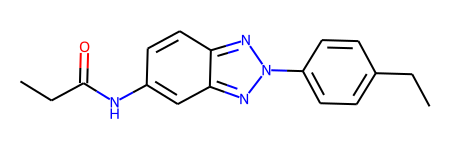

In [10]:
initial_mol[0]

In [11]:
first_structure_similarity = get_similarity(initial_mol[0], standarized_mols)

In [12]:
max(first_structure_similarity)

0.29185185185185186

In [13]:
def get_similarity_lists_of_mols(mol_list, smi_list): #first list - mols, second smiles
    sim0 = mol_list
    sim1 = [Chem.MolFromSmiles(smiles) for smiles in smi_list]
    sim00 = [Chem.RDKFingerprint(x) for x in sim0]
    sim11 = [Chem.RDKFingerprint(x) for x in sim1]
    result = []
    for finger in sim00:
        for finger_2 in sim11:
            similarity = TanimotoSimilarity(finger,finger_2)
            result.append(similarity)
    return result

In [14]:
dataframe__ = get_similarity_lists_of_mols(initial_mol, standarized_mols)

In [15]:
dataframe = pd.DataFrame(dataframe__, columns=['Tanimoto similarity: generated structures with initial ROR-y activ distribution'])

MIN similarity: 0.1969147005444646
MAX similarity: 1.0


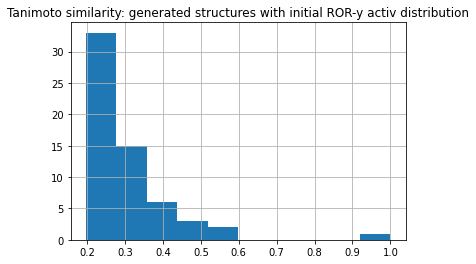

In [16]:
dataframe.hist()
print("MIN similarity: "+str(min(dataframe__)))
print("MAX similarity: "+str(max(dataframe__)))


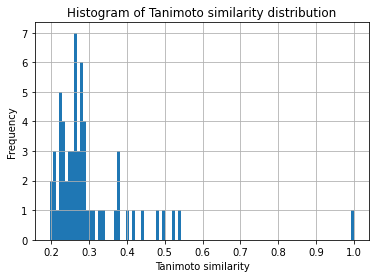

count    60.000000
mean      0.303381
std       0.121414
min       0.196915
25%       0.241008
50%       0.269833
75%       0.307928
max       1.000000
Name: Tanimoto similarity: generated structures with initial ROR-y activ distribution, dtype: float64


In [17]:
plt.hist(dataframe['Tanimoto similarity: generated structures with initial ROR-y activ distribution'],bins=100)
plt.xlabel('Tanimoto similarity')
plt.ylabel('Frequency')
plt.title('Histogram of Tanimoto similarity distribution')
#plt.axvline(x=0.0, color='r')
plt.grid(True)
plt.show()

print(dataframe['Tanimoto similarity: generated structures with initial ROR-y activ distribution'].describe())
#print('Kurtosis:')
#print(round(whole_data_after_QED_Lipinski['SYBA_score'].kurtosis(),4))
#print('Skewness:')
#print(round(whole_data_after_QED_Lipinski['SYBA_score'].skew(),4))

In [18]:
print(dataframe[dataframe['Tanimoto similarity: generated structures with initial ROR-y activ distribution']<0.02].index.values)

[]


In [19]:
dataframe[dataframe['Tanimoto similarity: generated structures with initial ROR-y activ distribution']<0.1].head()

,Tanimoto similarity: generated structures with initial ROR-y activ distribution


## Similarity among docked molecules

In [20]:
#docked_mols are at the beginning of the notebook

In [21]:
initial_docked_similarity = get_similarity_lists_of_mols([Chem.MolFromSmiles(smi) for smi in docked_mols], docked_mols)

In [22]:
dataframe_docked = pd.DataFrame(initial_docked_similarity, columns=['Tanimoto similarity among docked molecules distribution'])

MIN similarity: 0.2179372197309417
MAX similarity: 1.0


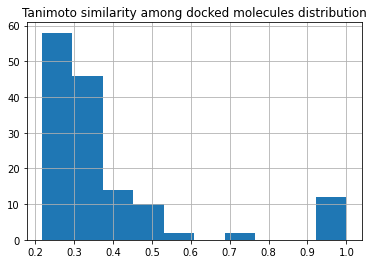

In [23]:
dataframe_docked.hist()
print("MIN similarity: "+str(min(initial_docked_similarity)))
print("MAX similarity: "+str(max(initial_docked_similarity)))

In [24]:
list_to_be_ = []
list_to_be_

[]

In [25]:
for mol in range(len(standarized_mols)): #comparision between generated mols
    simil = get_similarity(Chem.MolFromSmiles(standarized_mols[mol]), standarized_mols)
    list_to_be_.append(simil)

In [26]:
list_to_be_[0][0:5]

[1.0,
 0.25889679715302494,
 0.32332155477031804,
 0.34838274932614555,
 0.33102143757881464]

In [27]:
NEC = standarized_mols.copy()
KMV = standarized_mols.copy()

In [28]:
for elem in range(len(standarized_mols)):
    NEC[elem] = pd.DataFrame(list_to_be_[elem], columns=[standarized_mols[elem]])

In [29]:
frames = (NEC)

In [30]:
Final = pd.concat(frames, axis=1)
Final.head()

,Cc1cccc(C(=O)Cc2nc(Cl)cc3cccnc23)c1,Cc1cccc(C(=O)Nc2cc(-c3ccccc3)no2)c1,Cc1cccc(C(=O)Cc2nc(Cc3ccco3)cs2)c1,CC(=O)Nc1cccc(C(=O)N2Cc3ccccc3Nc3nc(C)nc(c3F)NN=C2C#N)c1,CC(=O)Nc1cccc(C(=O)N(Cc2cccc3c2N2C(C)=NNC2N3)c2nnc(C)s2)c1,CC(=O)Nc1cccc(C(=O)NCC=CC2C=CN(C)C=C(F)C=NC=C2C)c1,CCC(=O)NCC(F)c1nsc(-c2ccccn2)n1,CC1OCCN1Cc1nnc(-c2ccc(Br)cc2N)n1CO,CCCN1C(NC(=O)CC)C=CN1c1ncc(C#N)cc1C,Cc1cccc(C(=O)Cc2nc(Cc3ccoc3)cs2)c1,CC(=O)Nc1cccc(C(=O)N2NC(F)=NNCC3C2Cc2cccc(CN)c2N3C)c1,CCC1=NCCc2cncn2-c2cc(F)ccc2CCN(C(=O)c2cccc(NC(C)=O)c2)NN1
0,1.000000,0.258897,0.323322,0.348383,0.331021,0.229974,0.226656,0.297872,0.297753,0.311993,0.335621,0.324781
1,0.258897,1.000000,0.243167,0.285815,0.282017,0.247752,0.217937,0.264916,0.243666,0.223394,0.291639,0.278136
2,0.323322,0.243167,1.000000,0.310179,0.316993,0.243697,0.243313,0.262642,0.256815,0.735632,0.318504,0.292244
3,0.348383,0.285815,0.310179,1.000000,0.517782,0.368382,0.284016,0.351553,0.414680,0.305750,0.496183,0.493695
4,0.331021,0.282017,0.316993,0.517782,1.000000,0.346953,0.309114,0.382940,0.420420,0.297368,0.532872,0.479117


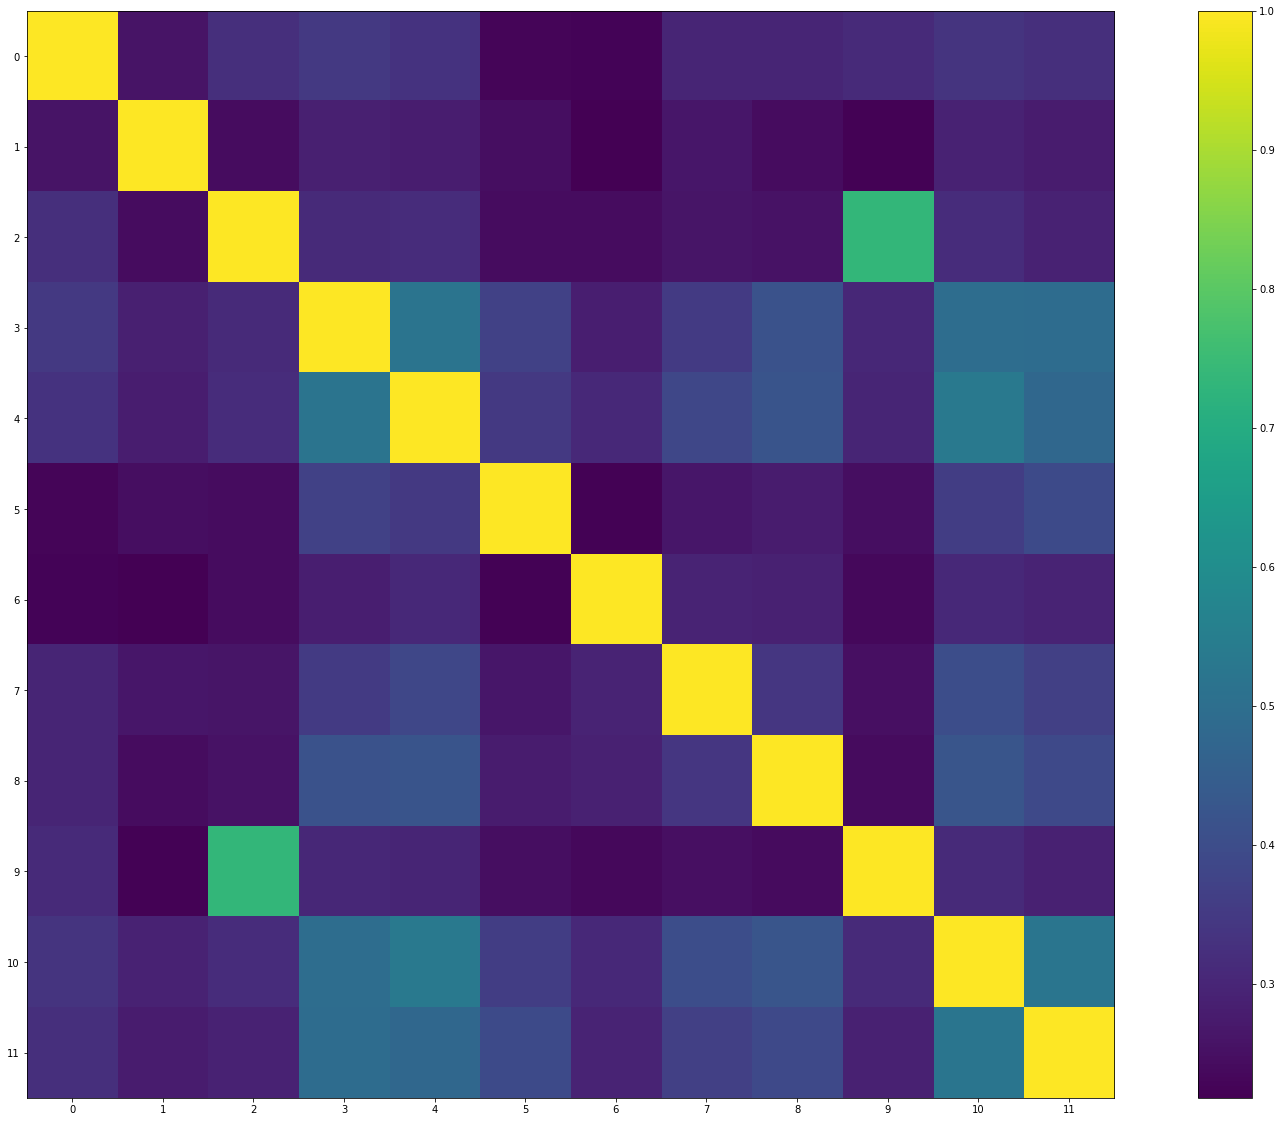

In [31]:
import matplotlib.pyplot as plt
plt.figure(figsize = (30, 20))
plt.imshow(Final, interpolation='nearest')
ax = plt.gca()
ax.set_xticks(range(0,len(standarized_mols),1))
ax.set_yticks(range(0,len(standarized_mols),1))
plt.colorbar()
plt.show()

## Checking if the data created is very similar to training data

In [32]:
whole_data_set = pd.read_parquet('../model/data/zinc20_FK_DC_BB_JA_HE_GA_KG_IC_CB_HJ_processed.parquet')

In [33]:
whole_data_set.head()

,smiles
336474016,CC1(C)COCCN1C(=O)CCNC(N)=O
1086464356,CCN[C@H]1C[C@H](CNC(=O)[C@@H]2CNC(=O)N2)C1
248404898,CO[C@H](C)CN1CCOC[C@H]1C(N)=O
1574709678,O=C(O)CCNC(=O)c1ccc(CO)nc1
1119650207,C[C@@H](CC(=O)O)C(=O)N1C[C@H](O)C[C@H]1CO


## Training was done on 250,000 of molecules
### Tanimoto simalirity distribution among newly generated and trained SMILES

In [34]:
whole_data_set__100 = whole_data_set['smiles'] #will be used later, almost 1M structures

In [35]:
whole_data_set = whole_data_set['smiles'][:250000]

In [36]:
len(whole_data_set)

250000

In [37]:
whole_data_set_smi = [Chem.MolFromSmiles(smi) for smi in whole_data_set]

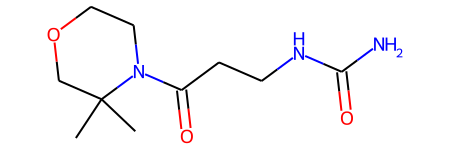

In [38]:
whole_data_set_smi[0]

In [39]:
#isomeric SMILES to canonical SMILES
whole_data_set_smi_cannonical = []
for mol in whole_data_set_smi:
    cannonical = Chem.MolToSmiles(mol, isomericSmiles=False)
    whole_data_set_smi_cannonical.append(cannonical)
whole_data_set_smi_cannonical[0:3]

['CC1(C)COCCN1C(=O)CCNC(N)=O',
 'CCNC1CC(CNC(=O)C2CNC(=O)N2)C1',
 'COC(C)CN1CCOCC1C(N)=O']

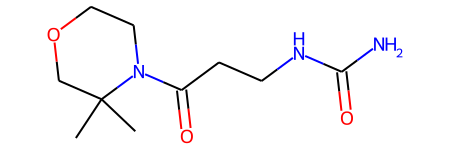

In [40]:
whole_data_set_smi[0]

In [41]:
whole_data_set_smi_cannonical[0]

'CC1(C)COCCN1C(=O)CCNC(N)=O'

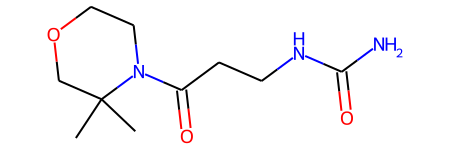

In [42]:
whole_data_set_smi_cannonical_mol = [Chem.MolFromSmiles(smi) for smi in whole_data_set_smi_cannonical]
whole_data_set_smi_cannonical_mol[0]

In [43]:
df = get_similarity_lists_of_mols(whole_data_set_smi_cannonical_mol, docked_mols) #second param as list of SMILES

In [44]:
dataframe_train = pd.DataFrame(df, columns=['Tanimoto simalirity distribution among newly generated and trained SMILES'])

MIN similarity: 0.013782542113323124
MAX similarity: 0.564889606892838


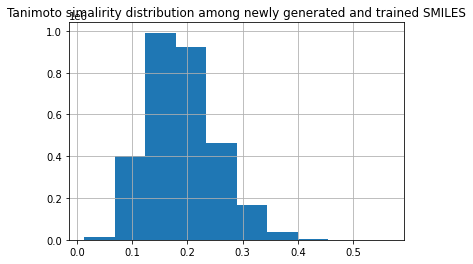

In [45]:
dataframe_train.hist()
print("MIN similarity: "+str(min(df)))
print("MAX similarity: "+str(max(df)))

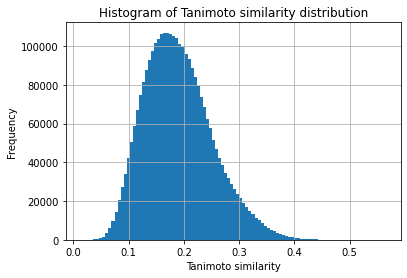

count    3.000000e+06
mean     1.901376e-01
std      6.144361e-02
min      1.378254e-02
25%      1.448692e-01
50%      1.841831e-01
75%      2.283688e-01
max      5.648896e-01
Name: Tanimoto simalirity distribution among newly generated and trained SMILES, dtype: float64


In [46]:
plt.hist(dataframe_train['Tanimoto simalirity distribution among newly generated and trained SMILES'],bins=100)
plt.xlabel('Tanimoto similarity')
plt.ylabel('Frequency')
plt.title('Histogram of Tanimoto similarity distribution')
#plt.axvline(x=0.0, color='r')
plt.grid(True)
plt.show()

print(dataframe_train['Tanimoto simalirity distribution among newly generated and trained SMILES'].describe())

In [47]:
new_ = dataframe_train[dataframe_train['Tanimoto simalirity distribution among newly generated and trained SMILES']>0.5]

In [48]:
len(new_['Tanimoto simalirity distribution among newly generated and trained SMILES'])

46

## Check if initial SMILES is present in PUBCHEM database (Kiniase inhibitors)

In [49]:
def find_smiles_in_PUBCHEM(smiles):
    compounds = []
    try:
        compound = pcp.get_compounds(smiles, 'smiles')
        compounds.append(compound)
    except:
        print("Not found : "+ str(smiles))
    return compounds

In [50]:
test_if_initial_data_can_be_found = [find_smiles_in_PUBCHEM(smiles) for smiles in initial_smi['SMILES']]

In [51]:
len(test_if_initial_data_can_be_found)

5

In [52]:
test_if_initial_data_can_be_found

[[[Compound(807146)]],
 [[Compound(16445174)]],
 [[Compound(71470549)]],
 [[Compound(71811962)]],
 [[Compound(135337558)]]]

## Check if newly generated SMILES is present in PUBCHEM database

In [53]:
test_if_newly_generated_data_can_be_found = [find_smiles_in_PUBCHEM(smiles) for smiles in to_check_in_PUBCHEM]

In [54]:
test_if_newly_generated_data_can_be_found

[[[Compound()]],
 [[Compound(16445174)]],
 [[Compound()]],
 [[Compound()]],
 [[Compound()]],
 [[Compound()]],
 [[Compound()]],
 [[Compound()]],
 [[Compound()]],
 [[Compound()]],
 [[Compound()]],
 [[Compound()]]]

In [55]:
smiles_found_in_pubchem = []
for i in range(len(test_if_newly_generated_data_can_be_found)):
    try:
        smiles_found_in_pubchem.append(test_if_newly_generated_data_can_be_found[i][0][0].canonical_smiles)
    except:
        pass
smiles_found_in_pubchem_1 = []
for val in smiles_found_in_pubchem:
    if val != None :
        smiles_found_in_pubchem_1.append(val)
smiles_found_in_pubchem_1

['CC1=CC(=CC=C1)C(=O)NC2=CC(=NO2)C3=CC=CC=C3']